In [1]:
%matplotlib inline
from common_imports import *

Couldn't import dot_parser, loading of dot files will not be possible.


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Define Tasks

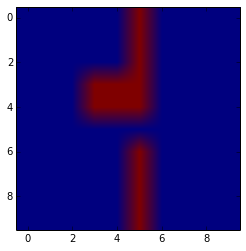

In [39]:
H = W = 10
grid = np.zeros((H, W))
grid[3:5, 3:5] = 1.
grid[:5, 5] = 1.
grid[6:, 5] = 1.
goal = {(W-1, H-1): 1.}
imshow(grid)
show()

pos_list = []
for h in range(0, H):
    for w in range(0, W):
        if (w, h) in goal or grid[w, h] > 0.:
            continue
        pos_list.append((w, h))

tasks = [GridWorldFixedStart(pos, grid=grid, action_stoch=0.2, goal=goal, rewards=goal, wall_penalty=0.)
         for pos in pos_list]
tasks_by_pos = {task.start_pos: task for task in tasks}
random.shuffle(tasks)

test_pos_list = [(0,0), (2,2), (6,6), (8,8)]
test_tasks = [GridWorldFixedStart(pos, grid=grid, action_stoch=0.2, goal=goal, rewards=goal, wall_penalty=0.)
         for pos in test_pos_list]
task0 = tasks[0]

In [40]:
# create the task.
state_shape = task0.state_shape
task = task0
# define potential neural network architectures.
def two_layer(states):
    '''
    two layer neural network with same number of hidden units.
    '''
    state_vecs = states.flatten(2)
    return arch.two_layer(state_vecs, np.prod(task.state_shape), 128, task.num_actions)





# Kernels and Expansions

In [4]:
def mf_xy(task):
    return np.array([task.start_pos[0], task.start_pos[1]])

def kernel_func(task_i, task_j):
    feat_i = mf_xy(task_i)
    feat_j = mf_xy(task_j)
    return np.exp(1 - 1 * np.sum(np.abs(feat_i - feat_j)))

In [5]:
def expand_func(task):
    (x,y) = task.start_pos
    new_tasks = []
    for xs in [-1, 0, 1]:
        for ys in [-1, 0, 1]:
            pos = (x + xs, y + ys)
            if pos in tasks_by_pos:
                new_tasks.append(tasks_by_pos[pos])
    return new_tasks

In [6]:
expand_func(tasks_by_pos[(8,9)])

[(7, 8) -> (9, 9),
 (7, 9) -> (9, 9),
 (8, 8) -> (9, 9),
 (8, 9) -> (9, 9),
 (9, 8) -> (9, 9)]

## Utils

In [7]:
def plot_scores():
    keys = scores[0].keys()
    xs = exs
    for key in keys:
        ys = [score[key] for score in scores]
        plot(xs, ys)
    legend(keys)
    show()

# Train and Eval funcs

iteration 0
count


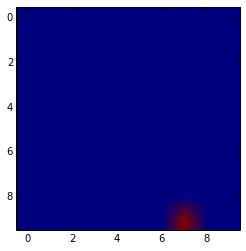

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018)]
{'latest score': {(9, 7) -> (9, 9): 0.037659316825000018},
 'score after': 0.037659316825000018,
 'score before': 0.0,
 'task chosen': (9, 7) -> (9, 9)}
---------------------------------------
iteration 1
count


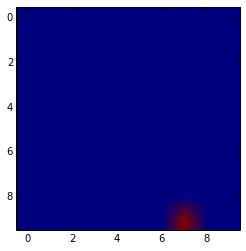

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394)]
{'latest score': {(9, 7) -> (9, 9): 0.22923415919934303},
 'score after': 0.22923415919934303,
 'score before': 0.051715391714229099,
 'task chosen': (9, 7) -> (9, 9)}
---------------------------------------
iteration 2
count


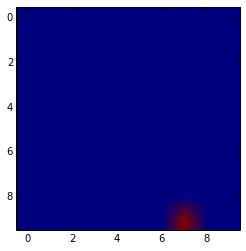

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298)]
{'latest score': {(9, 7) -> (9, 9): 0.071519423633305976},
 'score after': 0.071519423633305976,
 'score before': 0.24794474680503897,
 'task chosen': (9, 7) -> (9, 9)}
---------------------------------------
iteration 3
count


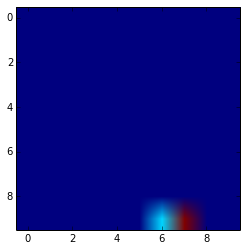

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932)]
{'latest score': {(9, 6) -> (9, 9): 0.62151488897505369,
                  (9, 7) -> (9, 9): 0.071519423633305976},
 'score after': 0.62151488897505369,
 'score before': 0.024342046055514387,
 'task chosen': (9, 6) -> (9, 9)}
---------------------------------------
iteration 4
count


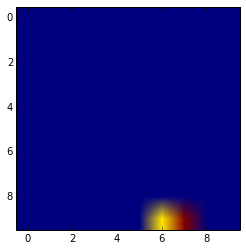

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172)]
{'latest score': {(9, 6) -> (9, 9): 0.67249101795861732,
                  (9, 7) -> (9, 9): 0.071519423633305976},
 'score after': 0.67249101795861732,
 'score before': 0.6704870995852612,
 'task chosen': (9, 6) -> (9, 9)}
---------------------------------------
iteration 5
count


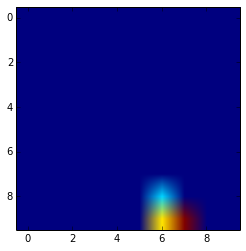

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601)]
{'latest score': {(8, 6) -> (9, 9): 0.27423168774121548,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (9, 7) -> (9, 9): 0.071519423633305976},
 'score after': 0.27423168774121548,
 'score before': 0.19462543439479288,
 'task chosen': (8, 6) -> (9, 9)}
---------------------------------------
iteration 6
count


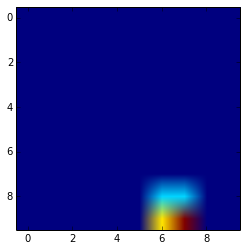

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111)]
{'latest score': {(8, 6) -> (9, 9): 0.27423168774121548,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.071519423633305976},
 'score after': 0.21126051504338367,
 'score before': 0.24397812717312878,
 'task chosen': (8, 7) -> (9, 9)}
---------------------------------------
iteration 7
count


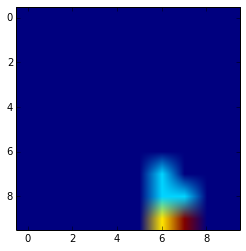

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.27423168774121548,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.071519423633305976},
 'score after': 0.099202524651084853,
 'score before': 0.052600315463059939,
 'task chosen': (7, 6) -> (9, 9)}
---------------------------------------
iteration 8
count


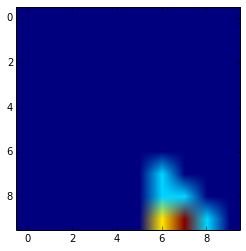

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.27423168774121548,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.071519423633305976,
                  (9, 8) -> (9, 9): 0.94767029601718089},
 'score after': 0.94767029601718089,
 'score before': 0.92712158399829592,
 'task chosen': (9, 8) -> (9, 9)}
---------------------------------------
iteration 9
count


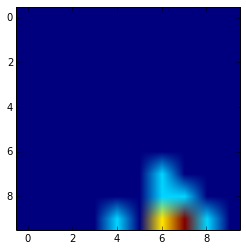

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.27423168774121548,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.071519423633305976,
                  (9, 4) -> (9, 9): 0.0,
                  (9, 8) -> (9, 9): 0.94767029601718089},
 'score after': 0.0,
 'score before': 0.0,
 'task chosen': (9, 4) -> (9, 9)}
---------------------------------------
iteration 10
count


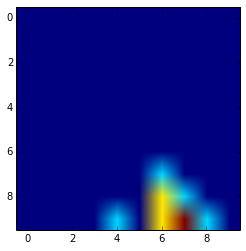

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.64270091066481005,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.071519423633305976,
                  (9, 4) -> (9, 9): 0.0,
                  (9, 8) -> (9, 9): 0.94767029601718089},
 'score after': 0.64270091066481005,
 'score before': 0.30210304987373682,
 'task chosen': (8, 6) -> (9, 9)}
---------------------------------------
ite

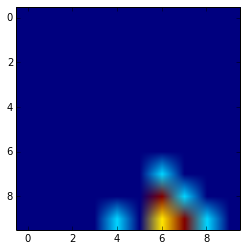

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.2656787055332287,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.071519423633305976,
                  (9, 4) -> (9, 9): 0.0,
                  (9, 8) -> (9, 9): 0.94767029601718089},
 'score after': 0.2656787055332287,
 'score before': 0.65535517494090001,
 'task chosen': (8, 6) -> (9, 9)}
--

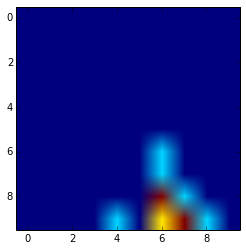

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.2656787055332287,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (6, 6) -> (9, 9): 0.49182869538377888,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.071519423633305976,
                  (9, 4) -> (9, 9): 0.0,
                  (9, 8) -> (9, 9): 0.94767029601718089},
 'score aft

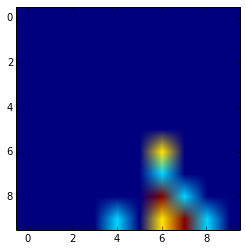

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.2656787055332287,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (6, 6) -> (9, 9): 0.053228526799481896,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.071519423633305976,
                  (9, 4) -> (9, 9): 0.0,
                  (9, 8) 

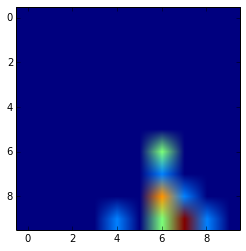

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.2656787055332287,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (6, 6) -> (9, 9): 0.053228526799481896,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9): 0.82625607032571013,
                  (9, 

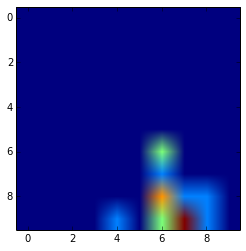

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.2656787055332287,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (6, 6) -> (9, 9): 0.053228526799481896,
                  (8, 7) -> (9, 9): 0.21126051504338367,
                  (9, 7) -> (9, 9)

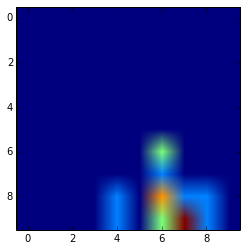

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0)]
{'latest score': {(7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.2656787055332287,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (6, 6) -> (9, 9): 0.053228526799481896,
                  (8, 7) -> (9, 9): 0.21126051504338367,
        

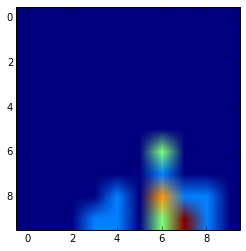

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0)]
{'latest score': {(9, 3) -> (9, 9): 0.0,
                  (7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.2656787055332287,
                  (9, 6) -> (9, 9): 0.67249101795861732,
                  (6, 6) -> (9, 9): 0.053228526799481896

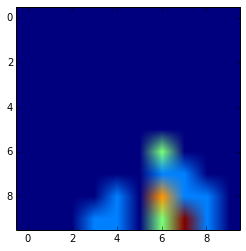

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034)]
{'latest score': {(7, 7) -> (9, 9): 0.63732624029280005,
                  (9, 3) -> (9, 9): 0.0,
                  (7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6) -> (9, 9): 0.2656787055332287,
            

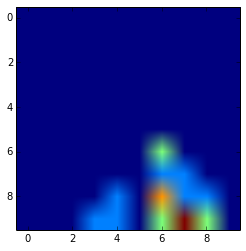

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888)]
{'latest score': {(7, 7) -> (9, 9): 0.63732624029280005,
                  (9, 3) -> (9, 9): 0.0,
                  (7, 6) -> (9, 9): 0.099202524651084853,
                  (8, 6)

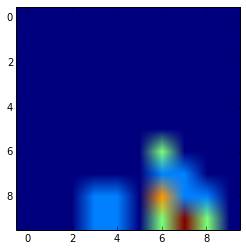

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0)]
{'latest score': {(7, 7) -> (9, 9): 0.63732624029280005,
                  (8, 3) -> (9, 9): 0.0,
                  (9, 3) -> (9, 9): 0.0,
               

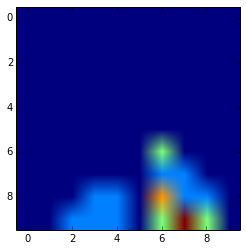

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0)]
{'latest score': {(7, 7) -> (9, 9): 0.63732624029280005,
                  (8, 3) -> (9, 9): 0.0,
                  (9, 3) -> (9

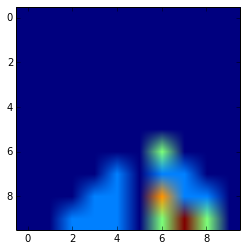

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419)]
{'latest score': {(7, 4) -> (9, 9): 0.0018530201888518419,
                  (7, 7) 

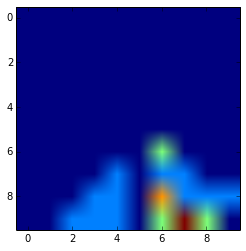

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681)]
{'latest score': {(7, 4) -> (9, 9): 0.0

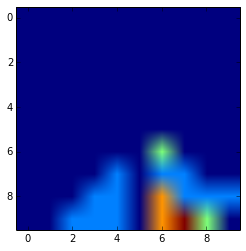

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

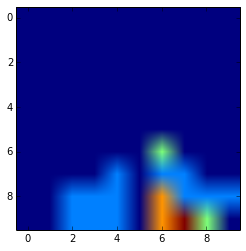

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

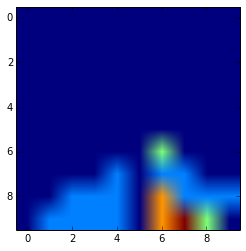

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

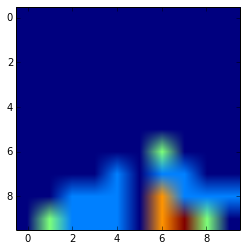

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

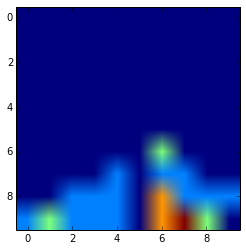

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

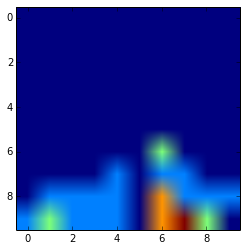

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

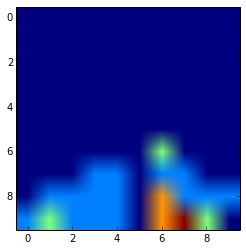

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

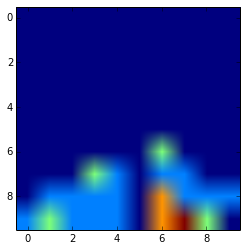

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

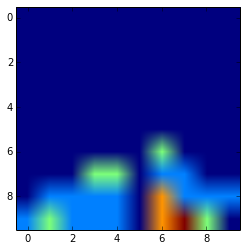

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

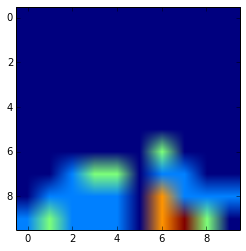

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

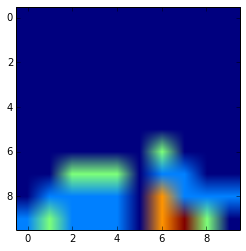

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

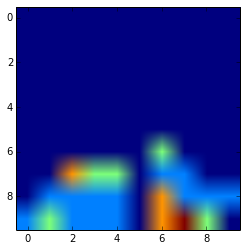

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

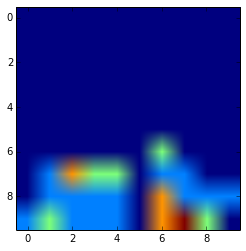

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

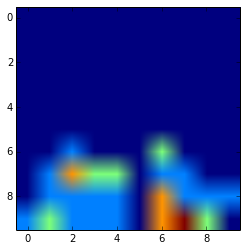

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

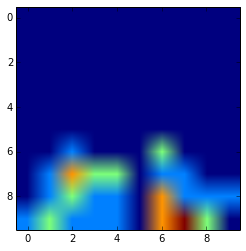

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

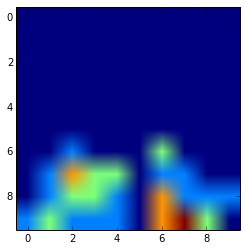

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

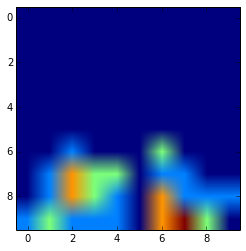

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

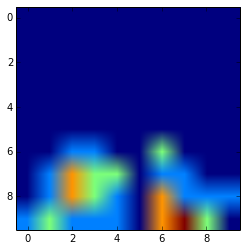

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

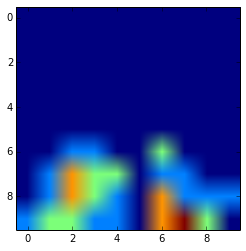

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

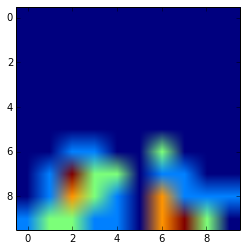

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

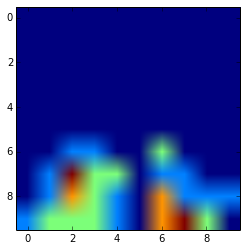

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

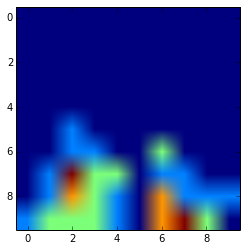

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

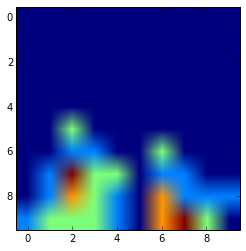

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

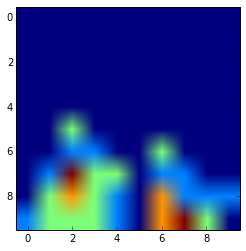

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

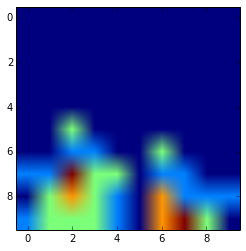

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

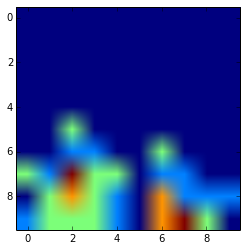

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

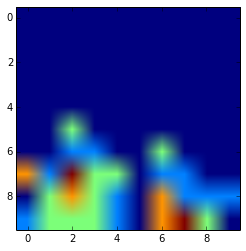

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

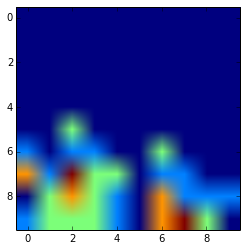

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

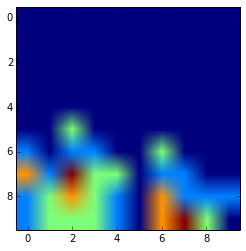

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

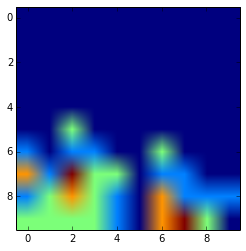

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

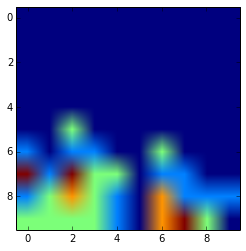

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

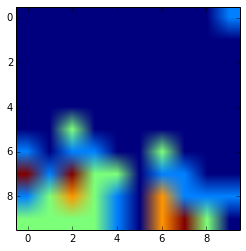

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

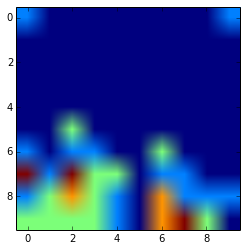

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

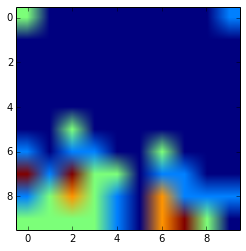

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

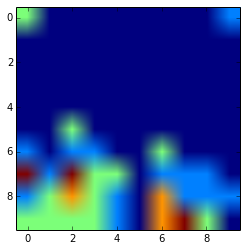

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

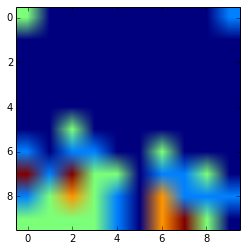

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

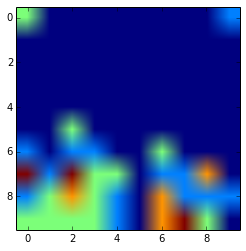

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

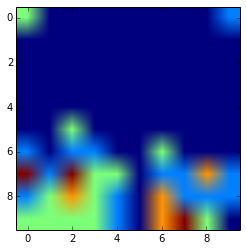

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

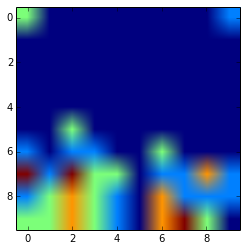

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

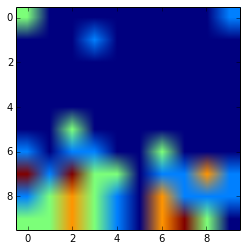

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

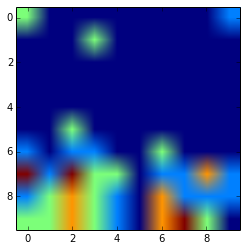

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

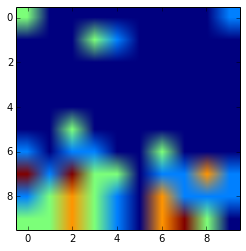

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

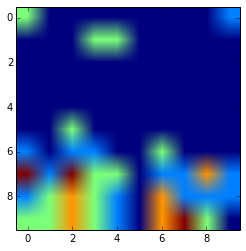

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

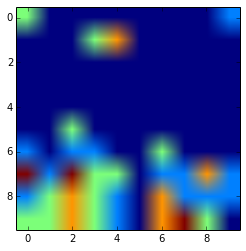

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

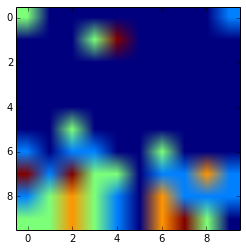

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

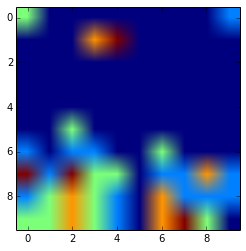

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

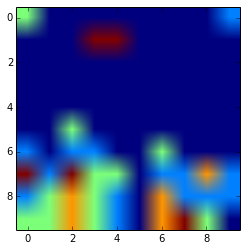

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

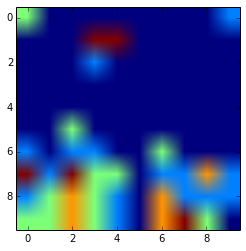

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

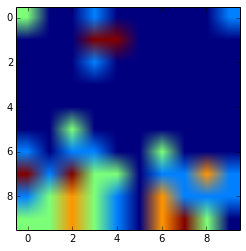

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

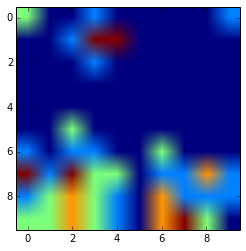

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

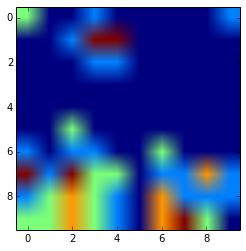

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

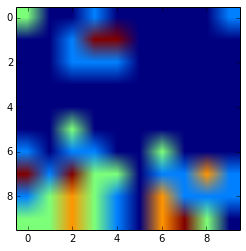

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

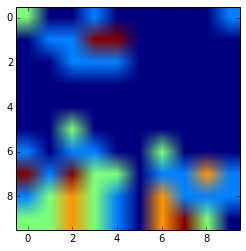

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

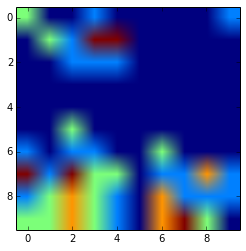

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

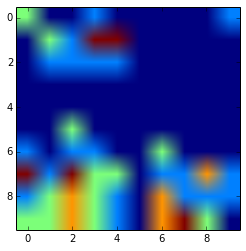

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

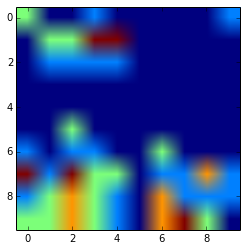

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

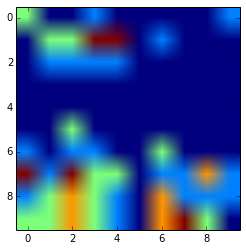

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

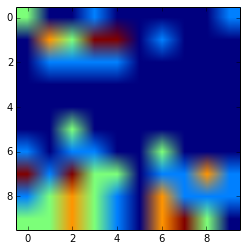

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

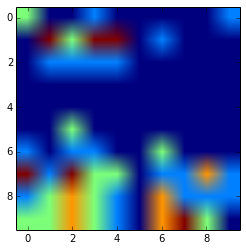

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

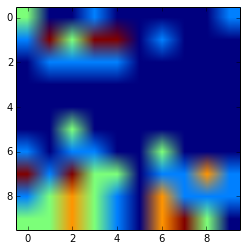

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

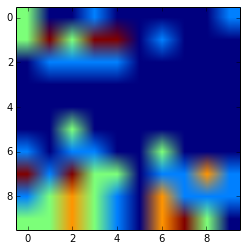

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

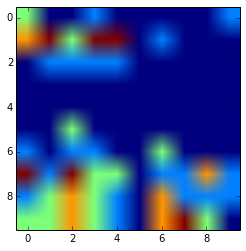

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

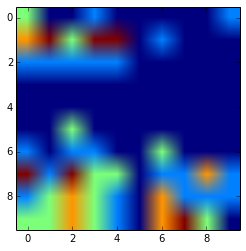

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

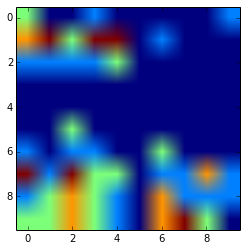

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

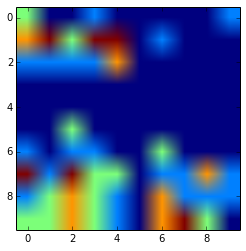

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

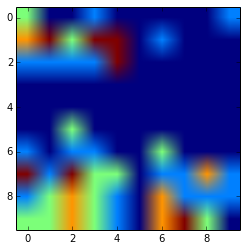

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

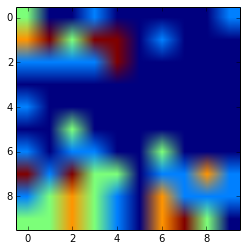

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

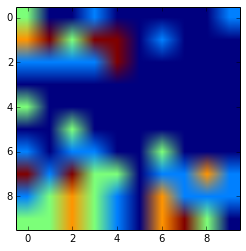

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

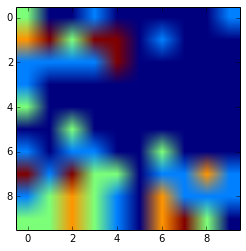

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

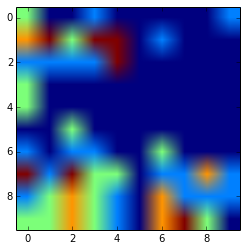

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

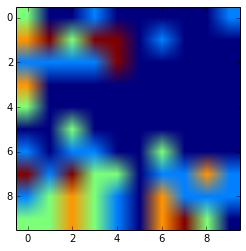

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

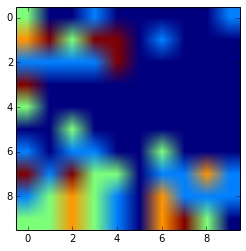

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

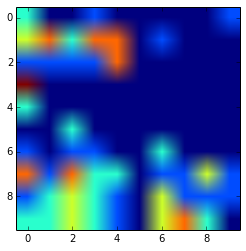

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

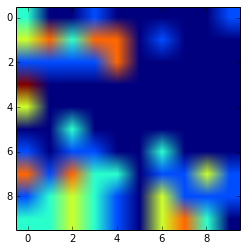

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

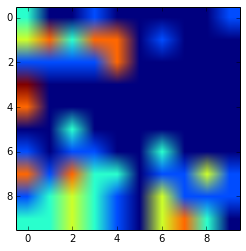

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

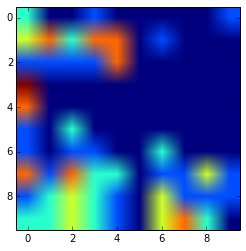

im_mem
[((9, 7) -> (9, 9), 0.037659316825000018),
 ((9, 7) -> (9, 9), 0.17751876748511394),
 ((9, 7) -> (9, 9), -0.17642532317173298),
 ((9, 6) -> (9, 9), 0.59717284291953932),
 ((9, 6) -> (9, 9), 0.0020039183733561172),
 ((8, 6) -> (9, 9), 0.079606253346422601),
 ((8, 7) -> (9, 9), -0.032717612129745111),
 ((7, 6) -> (9, 9), 0.046602209188024914),
 ((9, 8) -> (9, 9), 0.020548712018884974),
 ((9, 4) -> (9, 9), 0.0),
 ((8, 6) -> (9, 9), 0.34059786079107324),
 ((8, 6) -> (9, 9), -0.38967646940767131),
 ((6, 6) -> (9, 9), 0.25569301728305771),
 ((6, 6) -> (9, 9), -0.42520951350318725),
 ((9, 7) -> (9, 9), 0.00028942232570983162),
 ((8, 8) -> (9, 9), -0.0046765006110000007),
 ((8, 4) -> (9, 9), 0.0),
 ((9, 3) -> (9, 9), 0.0),
 ((7, 7) -> (9, 9), -0.012409349939100034),
 ((9, 8) -> (9, 9), -0.013331968999999888),
 ((8, 3) -> (9, 9), 0.0),
 ((9, 2) -> (9, 9), 0.0),
 ((7, 4) -> (9, 9), 0.0018530201888518419),
 ((8, 9) -> (9, 9), -0.0092941369608998681),
 ((9, 6) -> (9, 9), -0.0056208649860902

In [69]:
def feat_goal_dist(task):
    return np.abs(task.start_pos[0] - W + 1) + np.abs(task.start_pos[1] - H + 1)

def feat_dist(task_a, task_b):
    return np.abs(task_a.start_pos[0] - task_b.start_pos[0]) + np.abs(task_a.start_pos[1] - task_b.start_pos[1])

def mf_goal_dist_interval(im_mem, curr_task, interval, win_size):
    curr_feat = feat_goal_dist(curr_task)
    if curr_feat < interval[0] or curr_feat >= interval[1]:
        return 0.
    avg_im = 0.
    avg_count = 0
    win_count = 0
    for (task, im) in im_mem[::-1]:
        feat = feat_goal_dist(task)
        if feat >= interval[0] and feat < interval[1]:
            avg_im += im
            avg_count += 1
            win_count += 1
            if win_count >= win_size:
                break
    if avg_count == 0:
        return 0.
    else:
        return avg_im / avg_count

def mf_nb(im_mem, curr_task):
    avg_im = 0.
    for (task, im) in im_mem[::-1]:
        dist = feat_dist(task, curr_task)
        avg_im += np.exp(1.-dist) * im
        if task == curr_task:
            break
    return avg_im

mf_exs = [mf_nb]

dqn = DQN(task0, arch_func=two_layer, state_type=T.tensor4)

learner = DeepQlearn(dqn, gamma=0.9, lr=1e-3, memory_size = 1000, epsilon=0.3)
budget = 30
tol=1e-4
train_func = lambda task:  learner.run(task, num_episodes = 3, tol=tol, budget=budget)
eval_func = lambda policy, task: reward_stochastic(policy, task, gamma=0.9, budget=budget, num_trials=100, tol=tol)
# eval_func = lambda policy, task: qval_stochastic(policy, task, gamma=0.9, budget=budget, num_trials=100, tol=tol)

meta = DQCL.DriftExpert(dqn, mf_exs, train_func, eval_func, eta=1e-4)
start_locs = []
ims = []
scores = []
exs = []
for it in range(100):
    meta.run(tasks, num_epochs=1)
    print 'iteration', it
    print 'count'
    count_vis = np.zeros((W, H))
    for task in meta.task_count:
        count_vis[task.start_pos] = meta.task_count[task]
    imshow(count_vis)
    show()
#     pprint(meta.task_count)
#     print 'pred'
#     pprint(meta.im_pred)
#     print 'ucb'
#     pprint(meta.im_ucb)
#     print 'meta features'
#     pprint(meta.im_feat)
    print 'im_mem'
    pprint(meta.im_mem)
    pprint(meta.diagnostics)
    ims.append(meta.diagnostics['score after'] - meta.diagnostics['score before'])
    start_locs.append(meta.diagnostics['task chosen'].start_pos)
    print '---------------------------------------'
    if (it + 1) % 1 == 0:
        test_score = {}
        for test_task in test_tasks:
            test_score[test_task.start_pos] = reward_stochastic(dqn, test_task, gamma=0.9,num_trials=100, tol=tol, method='eps-greedy', epsilon=0.)
        scores.append(test_score)
        exs.append(learner.total_exp)
        
        

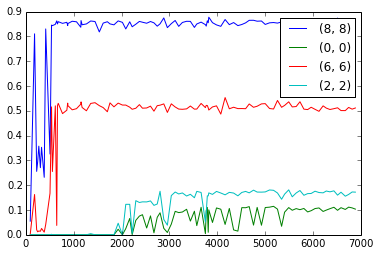

In [70]:
plot_scores()

### V0

In [8]:
dqn = DQN(task0, arch_func=two_layer, state_type=T.tensor4)

In [13]:
budget = 30
tol = 1e-4
gamma = 0.9
memory_size = 128
lr = 1e-3

learner = DeepQlearnMT(dqn, gamma=gamma, lr=lr, memory_size=memory_size, epsilon=0.1)
train_func = lambda task:  learner.run(task, num_episodes=1, tol=tol, budget=budget)
eval_func = lambda task: qval_stochastic(dqn, task, gamma=gamma, budget=budget, num_trials=100, tol=tol)

In [24]:
meta = GPv0(dqn, kernel_func, expand_func, train_func, eval_func, 
            eta=1/20., sigma_n=0.01, K0=10, K=1)

In [25]:
start_locs = []
ims = []
scores = []
exs = []
for it in range(100):
    meta.run(tasks, num_epochs=1)
    to_show = ['new-tasks-selected', 'im', 'pred', 'ucb']
    pprint({key: meta.diagnostics[key] for key in to_show})
    print '---------------------------------------'
    if (it + 1) % 10 == 0:
        test_score = {}
        for test_task in test_tasks:
            test_score[test_task.start_pos] = reward_stochastic(dqn, test_task, gamma=0.9,num_trials=100, tol=tol, method='eps-greedy', epsilon=0.)
        scores.append(test_score)
        exs.append(learner.total_exp)
        
        

{'im': {(4, 1) -> (9, 9): 3.4810113944593046e-05,
        (3, 2) -> (9, 9): -2.4031838164566277e-06,
        (5, 3) -> (9, 9): 3.6626559098232661e-05,
        (9, 3) -> (9, 9): 8.7833735798953719e-05,
        (0, 4) -> (9, 9): 2.4895955171755964e-05,
        (4, 7) -> (9, 9): 0.00011470521696449855,
        (3, 8) -> (9, 9): 6.2257679033562476e-06,
        (9, 8) -> (9, 9): -0.060118965400195457,
        (4, 9) -> (9, 9): -8.0128450943038176e-05},
 'new-tasks-selected': [(1, 5) -> (9, 9)],
 'pred': {(3, 0) -> (9, 9): 3.627359033592138e-06,
          (4, 0) -> (9, 9): 1.2805468146110089e-05,
          (5, 0) -> (9, 9): 6.1569811011212846e-06,
          (2, 1) -> (9, 9): 3.7708529424435775e-06,
          (3, 1) -> (9, 9): 9.8601841463102732e-06,
          (5, 1) -> (9, 9): 1.6736409845343746e-05,
          (2, 2) -> (9, 9): -4.9389347159026388e-07,
          (4, 2) -> (9, 9): 1.5231309928839512e-05,
          (5, 2) -> (9, 9): 1.6288693174689296e-05,
          (6, 2) -> (9, 9): 7.3728409

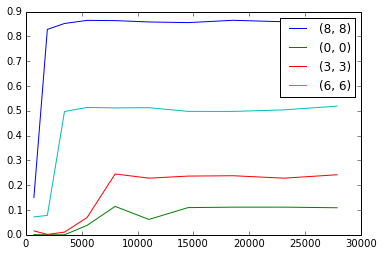

In [26]:
plot_scores()

### V0a

In [53]:
def visualize_tasks(active_tasks, passive_tasks):
    arr = np.zeros((H, W))
    for task in active_tasks:
        arr[task.start_pos] = 1.
    for task in passive_tasks:
        arr[task.start_pos] = -1.
    imshow(arr, interpolation='none')
    show()

def get_globals(*keys):
    result = {}
    if not keys:
        result.update(globals())
    else:
        result.update({
                key:globals()[key]
                for key in keys
            })
    return result

def save_globals(name, keys):
    global global_results
    if 'global_results' not in globals():
        global_results = {}
    global_results[name] = get_globals(*keys)

def save_results():
    global global_results
    with open('result-dot-at-corner-gp') as f:
        pickle.dump(global_results, f)

def plot_mean_scores(names):
    global global_results
    results = []
    tasks = {}
    figure(1, figsize=(10, 10))
    for name in names:
        result = global_results[name]
        results.append(result)
        tasks = result['scores'][0].keys()
    
    num_tasks = len(tasks)
    H = np.ceil(np.sqrt(num_tasks))
    for (ti, task) in enumerate(tasks):
        subplot(H, H, ti + 1)
        for result in results:
            plot(result['exs'], [t[task] for t in result['scores']])
        legend(names)
    
        xlabel('number of experiences')
        ylabel('score')
        title(task)
    
    show()

In [54]:
init_tasks = [task for task in tasks if np.sum(np.abs(np.array(task.start_pos) - np.array(task.goal.keys()[0]))) <= 1]

In [55]:
print init_tasks

[(9, 8) -> (9, 9), (8, 9) -> (9, 9)]


In [56]:
dqn = DQN(task0, arch_func=two_layer, state_type=T.tensor4)
budget = 5
tol = 1e-4
gamma = 0.9
memory_size = 128
lr = 1e-3

learner = DeepQlearnMT(dqn, gamma=gamma, lr=lr, memory_size=memory_size, epsilon=0.1)
train_func = lambda task:  learner.run(task, num_episodes=5, tol=tol, budget=budget)
eval_func = lambda task: qval_stochastic(dqn, task, gamma=gamma, budget=budget, num_trials=100, tol=tol)
# eval_func = lambda task: reward_stochastic(policy=dqn, task=task, gamma=gamma, budget=budget, num_trials=100, tol=tol)

# meta = GPv0a(dqn, kernel_func, expand_func, train_func, eval_func, 
#             init_tasks=init_tasks, eta=1e-4, sigma_n=0.01, K=5, K0=1)

meta = GPv0a(dqn, kernel_func, expand_func, train_func, eval_func, 
            init_tasks=None, eta=1e-4, sigma_n=0.01, K=5, K0=1)

{'im': {(7, 4) -> (9, 9): 0.085502967457713408,
        (1, 0) -> (9, 9): 0.073039786291725042,
        (0, 4) -> (9, 9): 0.065399920239277959,
        (3, 9) -> (9, 9): 0.079538510450395311,
        (7, 8) -> (9, 9): -0.034970951098034136,
        (4, 6) -> (9, 9): 0.084949546191947917},
 'new-tasks-selected': [(7, 4) -> (9, 9),
                        (4, 6) -> (9, 9),
                        (3, 9) -> (9, 9),
                        (1, 0) -> (9, 9),
                        (0, 4) -> (9, 9),
                        (0, 3) -> (9, 9)],
 'pred': {(6, 4) -> (9, 9): 0.032937321331358432,
          (7, 4) -> (9, 9): 0.085499819966518065,
          (1, 0) -> (9, 9): 0.073037115985614978,
          (8, 9) -> (9, 9): -0.0042768134171425436,
          (6, 9) -> (9, 9): -0.00042418689632664854,
          (7, 9) -> (9, 9): -0.011625584195528409,
          (4, 7) -> (9, 9): 0.03402216912778333,
          (5, 7) -> (9, 9): 0.011394828623321992,
          (7, 7) -> (9, 9): -0.007863921753064133,
 

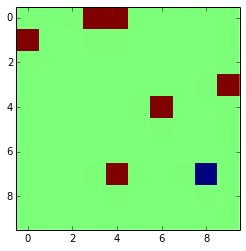

---------------------------------------
total_exp 150
{'im': {(7, 4) -> (9, 9): 0.20135849545508061,
        (1, 0) -> (9, 9): 0.1895452626519141,
        (0, 4) -> (9, 9): 0.13239370780273835,
        (0, 3) -> (9, 9): 0.16754761610350249,
        (3, 9) -> (9, 9): 0.25009662921510406,
        (7, 8) -> (9, 9): 0.2530609813200605,
        (4, 6) -> (9, 9): 0.21999023966804926},
 'new-tasks-selected': [(7, 8) -> (9, 9),
                        (3, 9) -> (9, 9),
                        (4, 6) -> (9, 9),
                        (7, 4) -> (9, 9),
                        (1, 0) -> (9, 9),
                        (6, 8) -> (9, 9)],
 'pred': {(6, 4) -> (9, 9): 0.07780350238196812,
          (7, 4) -> (9, 9): 0.2013513125637349,
          (1, 0) -> (9, 9): 0.18953840176288897,
          (8, 9) -> (9, 9): 0.035671152289626161,
          (6, 9) -> (9, 9): 0.047433588585069152,
          (7, 9) -> (9, 9): 0.096964245069086047,
          (4, 7) -> (9, 9): 0.095353397252322086,
          (5, 7) ->

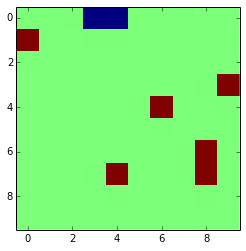

---------------------------------------
total_exp 300
{'im': {(7, 4) -> (9, 9): -0.030833790336481925,
        (1, 0) -> (9, 9): -0.0766536980407449,
        (0, 4) -> (9, 9): -0.0087170563750705587,
        (0, 3) -> (9, 9): -0.054931548857007184,
        (3, 9) -> (9, 9): -0.10357720769918377,
        (7, 8) -> (9, 9): 0.13233325408907404,
        (4, 6) -> (9, 9): -0.078076081305002626,
        (6, 8) -> (9, 9): 0.10945982435882678},
 'new-tasks-selected': [(7, 8) -> (9, 9),
                        (6, 8) -> (9, 9),
                        (8, 8) -> (9, 9),
                        (7, 9) -> (9, 9),
                        (7, 7) -> (9, 9),
                        (5, 0) -> (9, 9)],
 'pred': {(6, 4) -> (9, 9): -0.011467056999552409,
          (7, 4) -> (9, 9): -0.030832585871745217,
          (1, 0) -> (9, 9): -0.076650914689259983,
          (8, 9) -> (9, 9): 0.017301708562465695,
          (6, 9) -> (9, 9): 0.03578100261858478,
          (7, 9) -> (9, 9): 0.04703091998664477,
     

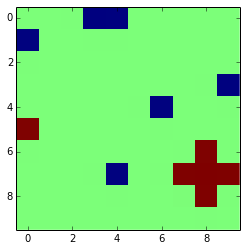

---------------------------------------
total_exp 450
{'im': {(5, 0) -> (9, 9): -0.12841990123298541,
        (7, 4) -> (9, 9): -0.12332744451311475,
        (1, 0) -> (9, 9): -0.080165629857032253,
        (7, 9) -> (9, 9): -0.023487844345537301,
        (7, 7) -> (9, 9): 0.23159464578210914,
        (0, 4) -> (9, 9): -0.07754203994978591,
        (0, 3) -> (9, 9): -0.080077304915055866,
        (3, 9) -> (9, 9): -0.0941346201773052,
        (8, 8) -> (9, 9): 0.29592764572902874,
        (7, 8) -> (9, 9): 0.2102156627113011,
        (4, 6) -> (9, 9): -0.10250394651248027,
        (6, 8) -> (9, 9): -0.18870936567971874},
 'new-tasks-selected': [(8, 8) -> (9, 9),
                        (7, 7) -> (9, 9),
                        (7, 8) -> (9, 9),
                        (8, 7) -> (9, 9),
                        (9, 8) -> (9, 9),
                        (9, 1) -> (9, 9)],
 'pred': {(5, 0) -> (9, 9): -0.12841524526434586,
          (6, 4) -> (9, 9): -0.052693052309948613,
          (7, 4) 

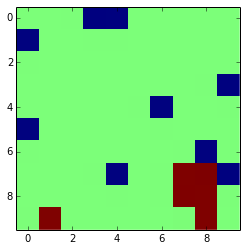

---------------------------------------
total_exp 580
{'im': {(5, 0) -> (9, 9): 0.20862582349669823,
        (7, 4) -> (9, 9): 0.12696250315900495,
        (1, 0) -> (9, 9): 0.14035199903940127,
        (7, 9) -> (9, 9): 0.03123251207469957,
        (7, 7) -> (9, 9): 0.11395369316743797,
        (0, 4) -> (9, 9): 0.10246620004794234,
        (0, 3) -> (9, 9): 0.1071445498202649,
        (3, 9) -> (9, 9): 0.17249645546863504,
        (9, 1) -> (9, 9): 0.07514040752524076,
        (8, 7) -> (9, 9): 0.028771900823876373,
        (8, 8) -> (9, 9): 0.053644231353767835,
        (9, 8) -> (9, 9): -0.010235151166757439,
        (7, 8) -> (9, 9): 0.030439562938805342,
        (4, 6) -> (9, 9): 0.2006612784100843,
        (6, 8) -> (9, 9): 0.21186185790190337},
 'new-tasks-selected': [(6, 8) -> (9, 9),
                        (5, 0) -> (9, 9),
                        (4, 6) -> (9, 9),
                        (3, 9) -> (9, 9),
                        (1, 0) -> (9, 9),
                        (1,

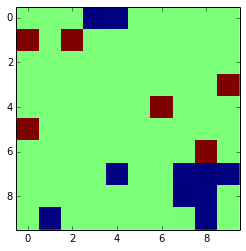

---------------------------------------
total_exp 711
{'im': {(5, 0) -> (9, 9): -0.0079983841061953553,
        (7, 4) -> (9, 9): -0.036152160083626927,
        (1, 0) -> (9, 9): -0.046819467973993834,
        (7, 9) -> (9, 9): -0.00041440377582313559,
        (7, 7) -> (9, 9): 0.052888252508340838,
        (0, 4) -> (9, 9): -0.034609794904525232,
        (0, 3) -> (9, 9): -0.032099405860712887,
        (3, 9) -> (9, 9): 0.022671226564884628,
        (9, 1) -> (9, 9): -0.012003486582100265,
        (8, 7) -> (9, 9): -0.012031498706242094,
        (1, 2) -> (9, 9): -0.043107863862326068,
        (8, 8) -> (9, 9): 0.003801591935461035,
        (9, 8) -> (9, 9): 0.011876151166757443,
        (7, 8) -> (9, 9): 0.0038639102373582146,
        (4, 6) -> (9, 9): 0.034505068787551829,
        (6, 8) -> (9, 9): 0.037571785381693867},
 'new-tasks-selected': [(7, 7) -> (9, 9),
                        (6, 8) -> (9, 9),
                        (4, 6) -> (9, 9),
                        (6, 7) -> (9, 

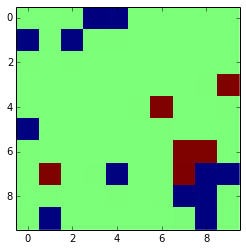

---------------------------------------
total_exp 860
{'im': {(5, 0) -> (9, 9): -0.1870861395080948,
        (7, 4) -> (9, 9): -0.071521839893825073,
        (1, 0) -> (9, 9): -0.068540604311902453,
        (7, 9) -> (9, 9): 0.01212104409590109,
        (7, 7) -> (9, 9): -0.033075212518598018,
        (6, 7) -> (9, 9): 0.071986046099716039,
        (0, 4) -> (9, 9): -0.044456837683497868,
        (0, 3) -> (9, 9): -0.047690159684643824,
        (3, 9) -> (9, 9): 0.14251323308047298,
        (9, 1) -> (9, 9): -0.047811666725878832,
        (7, 1) -> (9, 9): -0.076133872891648996,
        (8, 7) -> (9, 9): -0.0044164270116693327,
        (1, 2) -> (9, 9): -0.052704099139288307,
        (8, 8) -> (9, 9): -0.0090636272538011653,
        (9, 8) -> (9, 9): 0.0027940900602021479,
        (7, 8) -> (9, 9): 0.014092183292260363,
        (4, 6) -> (9, 9): 0.010802912492870465,
        (6, 8) -> (9, 9): 0.15321130841577257},
 'new-tasks-selected': [(6, 8) -> (9, 9),
                        (3, 9)

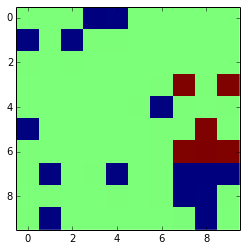

---------------------------------------
total_exp 1007
{'im': {(5, 0) -> (9, 9): 0.027308332493467896,
        (7, 4) -> (9, 9): 0.0086591161538106531,
        (1, 0) -> (9, 9): -0.029822616060521764,
        (6, 9) -> (9, 9): -0.0034618283722449572,
        (7, 9) -> (9, 9): -0.0044476480321011813,
        (7, 7) -> (9, 9): 0.0088116529855987169,
        (6, 7) -> (9, 9): 0.019519780161052713,
        (0, 4) -> (9, 9): -0.052345714165311752,
        (0, 3) -> (9, 9): -0.03954397293066525,
        (3, 9) -> (9, 9): 0.020824371002191588,
        (9, 1) -> (9, 9): -0.018279444694399682,
        (7, 1) -> (9, 9): 0.0084234412371525236,
        (8, 7) -> (9, 9): 0.020670808237044591,
        (1, 2) -> (9, 9): -0.032713136853838767,
        (8, 8) -> (9, 9): 0.01267245777050352,
        (9, 8) -> (9, 9): -0.015106090060202249,
        (7, 8) -> (9, 9): -0.0010846357392603201,
        (3, 7) -> (9, 9): 0.036980223006933322,
        (4, 6) -> (9, 9): 0.036296160605039041,
        (5, 8) -> (9

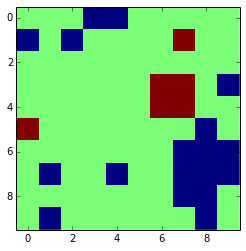

---------------------------------------
total_exp 1150
{'im': {(5, 0) -> (9, 9): 0.054802050061452584,
        (7, 4) -> (9, 9): -0.0040810042126318558,
        (1, 0) -> (9, 9): 0.014133566409443521,
        (6, 9) -> (9, 9): 0.024804145357558705,
        (7, 9) -> (9, 9): 0.0095574159159181882,
        (4, 7) -> (9, 9): 0.028662265028325473,
        (7, 7) -> (9, 9): 0.017652042646183697,
        (6, 7) -> (9, 9): 0.0084750894077484373,
        (0, 4) -> (9, 9): 0.012293650461036379,
        (0, 3) -> (9, 9): 0.0098047305553519426,
        (3, 9) -> (9, 9): 0.0170499665290334,
        (9, 1) -> (9, 9): -0.022374682038081142,
        (7, 1) -> (9, 9): -0.0098146129514691538,
        (8, 7) -> (9, 9): -0.009053551610622157,
        (1, 2) -> (9, 9): 0.0072913152525721364,
        (8, 8) -> (9, 9): -0.0019588695664265465,
        (9, 8) -> (9, 9): 0.0020123926157641359,
        (7, 8) -> (9, 9): -0.003523348924953762,
        (1, 7) -> (9, 9): 0.012614060066297395,
        (3, 7) -> (9,

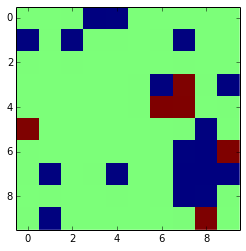

---------------------------------------
total_exp 1300
{'im': {(5, 0) -> (9, 9): -0.094119671085783924,
        (7, 4) -> (9, 9): -0.0097699302479103967,
        (1, 0) -> (9, 9): -0.062602802894954984,
        (6, 9) -> (9, 9): -0.025631552468318719,
        (7, 9) -> (9, 9): -0.00052716306115208056,
        (4, 7) -> (9, 9): -0.072119554273013031,
        (7, 7) -> (9, 9): -0.033667147649592444,
        (6, 7) -> (9, 9): -0.041900346774525254,
        (0, 4) -> (9, 9): -0.054773254926179425,
        (0, 3) -> (9, 9): -0.058316211715882943,
        (3, 9) -> (9, 9): -0.058479229784058895,
        (9, 1) -> (9, 9): -0.010453071000999875,
        (7, 1) -> (9, 9): -0.035671638069938227,
        (8, 7) -> (9, 9): -0.01871430124009188,
        (1, 2) -> (9, 9): -0.056907706024881037,
        (8, 8) -> (9, 9): -0.014715373433100476,
        (9, 8) -> (9, 9): -0.0068347530862803429,
        (7, 8) -> (9, 9): 0.0045777433210593133,
        (1, 7) -> (9, 9): -0.081353174870273104,
        (3,

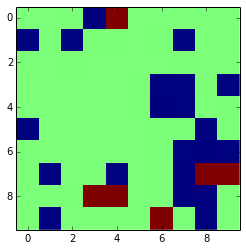

---------------------------------------
total_exp 1422
{'im': {(5, 0) -> (9, 9): -0.028601276562840006,
        (7, 4) -> (9, 9): -0.024492389120932767,
        (1, 0) -> (9, 9): -0.013355061046612667,
        (6, 9) -> (9, 9): 0.012817059252747787,
        (7, 9) -> (9, 9): -0.029616883027476004,
        (4, 7) -> (9, 9): -0.014095420872864528,
        (7, 7) -> (9, 9): 0.010186101610927145,
        (6, 7) -> (9, 9): 0.0077002613718608615,
        (8, 3) -> (9, 9): -0.031199209788719179,
        (0, 4) -> (9, 9): -0.013117394823979493,
        (9, 6) -> (9, 9): -0.017365082986044555,
        (0, 3) -> (9, 9): -0.0098661325890613549,
        (3, 9) -> (9, 9): -0.026463516143975241,
        (9, 1) -> (9, 9): 0.015607831254027996,
        (7, 1) -> (9, 9): -0.02459713861664628,
        (8, 7) -> (9, 9): 0.04020519461632821,
        (1, 2) -> (9, 9): -0.014706055279205828,
        (8, 4) -> (9, 9): -0.017157532397462205,
        (8, 8) -> (9, 9): 0.0052468624443341438,
        (9, 8) -> (

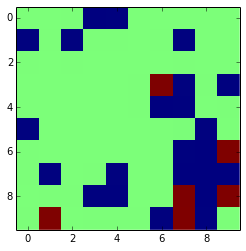

---------------------------------------
total_exp 1549
{'im': {(5, 0) -> (9, 9): 0.091137272463953117,
        (7, 4) -> (9, 9): 0.10287353363926538,
        (1, 0) -> (9, 9): 0.049210928784282029,
        (8, 9) -> (9, 9): -0.012414654604191888,
        (6, 9) -> (9, 9): -0.0033184752560947439,
        (7, 9) -> (9, 9): 0.013773199441832862,
        (4, 7) -> (9, 9): 0.038200347896233944,
        (7, 7) -> (9, 9): -0.010532563622211,
        (6, 7) -> (9, 9): -0.004083272322199627,
        (8, 3) -> (9, 9): 0.083231490955366833,
        (0, 4) -> (9, 9): 0.044948083165788522,
        (9, 6) -> (9, 9): 0.005832603844633355,
        (0, 3) -> (9, 9): 0.047988944155441401,
        (3, 9) -> (9, 9): 0.066699105777326684,
        (9, 1) -> (9, 9): -0.028552237718683246,
        (7, 1) -> (9, 9): 0.050811061164840743,
        (8, 7) -> (9, 9): -0.036588184668766455,
        (9, 7) -> (9, 9): 0.021168197537634437,
        (1, 2) -> (9, 9): 0.093588947667821554,
        (8, 4) -> (9, 9): 0.00

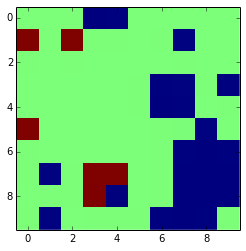

---------------------------------------
total_exp 1655
{'im': {(5, 0) -> (9, 9): -0.01485088632800341,
        (7, 4) -> (9, 9): 0.010722915115816717,
        (1, 0) -> (9, 9): -0.024460643589605882,
        (8, 9) -> (9, 9): 0.011845571868825844,
        (6, 9) -> (9, 9): 0.00086841398017911686,
        (7, 9) -> (9, 9): 0.014131395640343936,
        (4, 7) -> (9, 9): -0.017771103179354708,
        (7, 7) -> (9, 9): 0.016230004503377082,
        (6, 7) -> (9, 9): 0.012101412266598555,
        (8, 3) -> (9, 9): 0.0048359982973912585,
        (0, 4) -> (9, 9): -0.012966182937222404,
        (9, 6) -> (9, 9): -0.0017333445405443015,
        (0, 3) -> (9, 9): -0.013599026385636301,
        (7, 3) -> (9, 9): 0.0058104094385070248,
        (3, 9) -> (9, 9): -0.0010202907380612025,
        (9, 1) -> (9, 9): 0.012828366122226098,
        (7, 1) -> (9, 9): 0.014008572181584827,
        (8, 7) -> (9, 9): 0.020350438760825651,
        (9, 7) -> (9, 9): -0.010776799290946548,
        (1, 2) -> (9

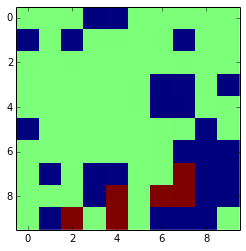

---------------------------------------
total_exp 1805
{'im': {(5, 0) -> (9, 9): 0.039429118651691908,
        (7, 4) -> (9, 9): 0.032114475488992211,
        (1, 0) -> (9, 9): 0.056663110609999345,
        (8, 9) -> (9, 9): -0.004656053777100877,
        (6, 9) -> (9, 9): -0.018927910483198196,
        (7, 9) -> (9, 9): -0.0042704315919883662,
        (4, 7) -> (9, 9): 0.040936914151582127,
        (7, 7) -> (9, 9): 0.0012283429709299964,
        (6, 7) -> (9, 9): 0.039766866086760277,
        (8, 3) -> (9, 9): 0.021364030485549829,
        (0, 4) -> (9, 9): 0.0019672558295212167,
        (8, 6) -> (9, 9): -0.013198132178778521,
        (9, 6) -> (9, 9): -0.010660682492993345,
        (0, 3) -> (9, 9): 0.0054260146224890116,
        (9, 2) -> (9, 9): 0.021924809541594703,
        (7, 3) -> (9, 9): 0.025609573066876973,
        (3, 9) -> (9, 9): 0.00026753268868195956,
        (9, 1) -> (9, 9): 0.0020918628983313953,
        (7, 1) -> (9, 9): 0.020263064544658649,
        (8, 7) -> (9,

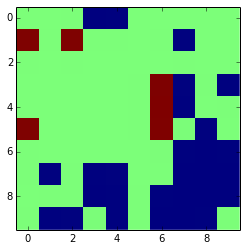

---------------------------------------
total_exp 1941
{'im': {(5, 0) -> (9, 9): -0.019991988743371353,
        (7, 4) -> (9, 9): -0.0011423422096778491,
        (1, 0) -> (9, 9): 0.0050230162446107118,
        (8, 9) -> (9, 9): -0.00069294622289917118,
        (6, 9) -> (9, 9): 0.016874978763033677,
        (7, 9) -> (9, 9): -0.0071093021556816183,
        (4, 7) -> (9, 9): -0.01565575338586872,
        (7, 7) -> (9, 9): -0.00080836525577387963,
        (6, 7) -> (9, 9): -0.03645149167839401,
        (8, 3) -> (9, 9): 0.0014497745940644791,
        (0, 4) -> (9, 9): 0.013073064383821026,
        (8, 6) -> (9, 9): 0.0035587557621723498,
        (5, 6) -> (9, 9): -0.015909686816790447,
        (9, 6) -> (9, 9): 0.028590147312404612,
        (0, 3) -> (9, 9): 0.0059399312067188043,
        (9, 2) -> (9, 9): -0.019718020647347401,
        (7, 3) -> (9, 9): -0.0044146603923228556,
        (3, 9) -> (9, 9): -0.0068011635520550118,
        (9, 1) -> (9, 9): -0.019601148846562194,
        (7,

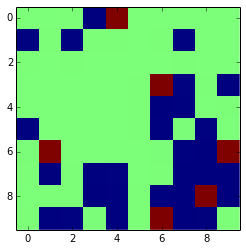

---------------------------------------
total_exp 2091
{'im': {(5, 0) -> (9, 9): 0.0010061206709642001,
        (7, 4) -> (9, 9): 0.0033716878576584564,
        (1, 0) -> (9, 9): 0.0008522293842650186,
        (8, 9) -> (9, 9): 0.0095690000000000497,
        (6, 9) -> (9, 9): 0.011567739740698468,
        (7, 9) -> (9, 9): 0.019473887522658107,
        (4, 7) -> (9, 9): 0.012516161673309378,
        (7, 7) -> (9, 9): 0.0011805660859269818,
        (6, 7) -> (9, 9): 0.03359482671180225,
        (8, 3) -> (9, 9): -0.001095394626640378,
        (0, 4) -> (9, 9): -0.0097179163934671686,
        (8, 6) -> (9, 9): 1.3236304976294022e-05,
        (5, 6) -> (9, 9): 0.022166610309231005,
        (9, 6) -> (9, 9): 0.0054470783119360267,
        (0, 3) -> (9, 9): -0.0026568943530497213,
        (9, 2) -> (9, 9): 0.012406757641599236,
        (7, 3) -> (9, 9): 0.0079695757539117729,
        (3, 9) -> (9, 9): 0.022295073425637024,
        (9, 1) -> (9, 9): 0.019541902806615941,
        (6, 1) -> (9

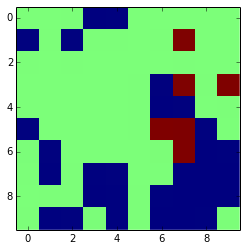

---------------------------------------
total_exp 2216
{'im': {(5, 0) -> (9, 9): -0.0081362723279179427,
        (7, 4) -> (9, 9): -0.047692530817241868,
        (1, 0) -> (9, 9): -0.050154844907556007,
        (8, 9) -> (9, 9): -0.018238118206910903,
        (6, 9) -> (9, 9): -0.036274864918388938,
        (7, 9) -> (9, 9): -0.019402372546152957,
        (4, 7) -> (9, 9): -0.0612375224158061,
        (5, 7) -> (9, 9): -0.035126825133046435,
        (7, 7) -> (9, 9): -0.016229944557305753,
        (6, 7) -> (9, 9): -0.061848105262257591,
        (8, 3) -> (9, 9): -0.021935843670216199,
        (0, 4) -> (9, 9): 0.001395526586703652,
        (8, 6) -> (9, 9): -0.0092858262971594607,
        (5, 6) -> (9, 9): -0.22387052429938986,
        (9, 6) -> (9, 9): -0.016059771046913141,
        (0, 3) -> (9, 9): -0.00013076669278666575,
        (9, 2) -> (9, 9): -0.022885781289635032,
        (7, 3) -> (9, 9): -0.033550671756174572,
        (3, 9) -> (9, 9): -0.053447717738806688,
        (9, 1)

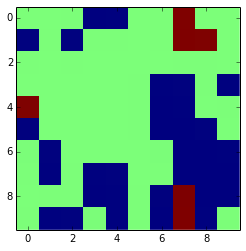

---------------------------------------
total_exp 2366
{'im': {(5, 0) -> (9, 9): 0.0053893131195938693,
        (7, 4) -> (9, 9): 0.037118630635544186,
        (1, 0) -> (9, 9): 0.032753664825029769,
        (8, 9) -> (9, 9): 0.015157449568701464,
        (6, 9) -> (9, 9): 0.035883428319745558,
        (7, 9) -> (9, 9): -0.0042657514117356854,
        (4, 7) -> (9, 9): 0.065269353956167619,
        (5, 7) -> (9, 9): 0.043758239053152126,
        (7, 7) -> (9, 9): 0.013193361186484287,
        (6, 7) -> (9, 9): 0.043037585118624766,
        (8, 3) -> (9, 9): 0.00012374074521900869,
        (0, 4) -> (9, 9): -0.011239518836302739,
        (8, 6) -> (9, 9): 0.021327330124131683,
        (5, 6) -> (9, 9): 0.21784008995945209,
        (9, 6) -> (9, 9): 0.024081931988547356,
        (0, 3) -> (9, 9): -0.0060202689023761136,
        (9, 2) -> (9, 9): -0.0080963524512880358,
        (4, 0) -> (9, 9): 0.00010650320016725168,
        (7, 3) -> (9, 9): 0.0084609815435363056,
        (3, 9) -> (9,

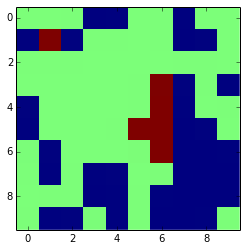

---------------------------------------
total_exp 2500
{'im': {(5, 0) -> (9, 9): -0.021768594978832378,
        (7, 4) -> (9, 9): -0.028888220249479263,
        (1, 0) -> (9, 9): -0.01730765994629424,
        (8, 9) -> (9, 9): -0.013613877337095071,
        (6, 9) -> (9, 9): -0.0094136165640421599,
        (7, 9) -> (9, 9): 0.0030789213722661746,
        (4, 7) -> (9, 9): -0.063619764623980279,
        (5, 7) -> (9, 9): -0.04518510446897217,
        (7, 7) -> (9, 9): 0.0010777697398940411,
        (6, 7) -> (9, 9): -0.041275036530172504,
        (8, 3) -> (9, 9): -0.018908984375227172,
        (0, 4) -> (9, 9): -0.011057972046802138,
        (8, 6) -> (9, 9): -0.035058848353411998,
        (5, 6) -> (9, 9): -0.061367136946886558,
        (9, 6) -> (9, 9): -0.027650874225581545,
        (6, 6) -> (9, 9): -0.064599749739938095,
        (0, 3) -> (9, 9): -0.017648611120833942,
        (9, 2) -> (9, 9): -0.013085664919116946,
        (4, 0) -> (9, 9): -0.025798436577856243,
        (7, 3) 

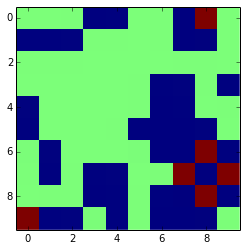

---------------------------------------
total_exp 2650
{'im': {(5, 0) -> (9, 9): 0.0069867345574278761,
        (7, 4) -> (9, 9): 0.012999981693510271,
        (1, 0) -> (9, 9): 0.018990810175289585,
        (8, 9) -> (9, 9): 0.019994545975304479,
        (6, 9) -> (9, 9): 0.018966203009585958,
        (7, 9) -> (9, 9): 0.0014990336953271122,
        (4, 7) -> (9, 9): 0.02902453557538659,
        (5, 7) -> (9, 9): -0.0080222339797555442,
        (7, 7) -> (9, 9): -0.014922373338071782,
        (6, 7) -> (9, 9): 0.018203072962590827,
        (8, 3) -> (9, 9): 0.009427353874108868,
        (0, 4) -> (9, 9): 0.042893390179331949,
        (8, 6) -> (9, 9): 0.019462643890490905,
        (5, 6) -> (9, 9): 0.023727195903152365,
        (9, 6) -> (9, 9): 0.010770938546827424,
        (6, 6) -> (9, 9): -0.0021176058731023906,
        (0, 3) -> (9, 9): 0.042859125358488161,
        (9, 2) -> (9, 9): 0.026078438312557517,
        (4, 0) -> (9, 9): 0.014293562163052415,
        (7, 3) -> (9, 9): -

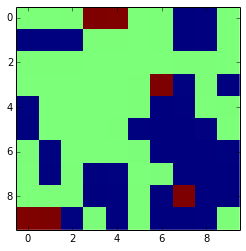

---------------------------------------
total_exp 2772


In [57]:
start_locs = []
ims = []
scores = []
exs = []
for it in range(20):
    meta.run(tasks, num_epochs=1)
    to_show = ['new-tasks-selected', 'im', 'pred', 'ucb']
    pprint({key: meta.diagnostics[key] for key in to_show})
    visualize_tasks(meta.diagnostics['active-tasks'], meta.diagnostics['passive-tasks'])
    print '---------------------------------------'
    if (it + 1) % 1 == 0:
        print 'total_exp', learner.total_exp
        test_score = {}
        for test_task in test_tasks:
            test_score[test_task.start_pos] = reward_stochastic(dqn, test_task, gamma=gamma, budget=None, num_trials=100, tol=tol, method='eps-greedy', epsilon=0.)
        scores.append(test_score)
        exs.append(learner.total_exp)
        
        

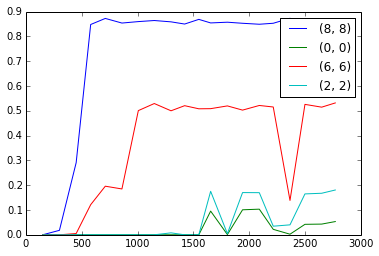

In [58]:
plot_scores()

In [59]:
save_globals('v0a-random', ['exs', 'scores'])

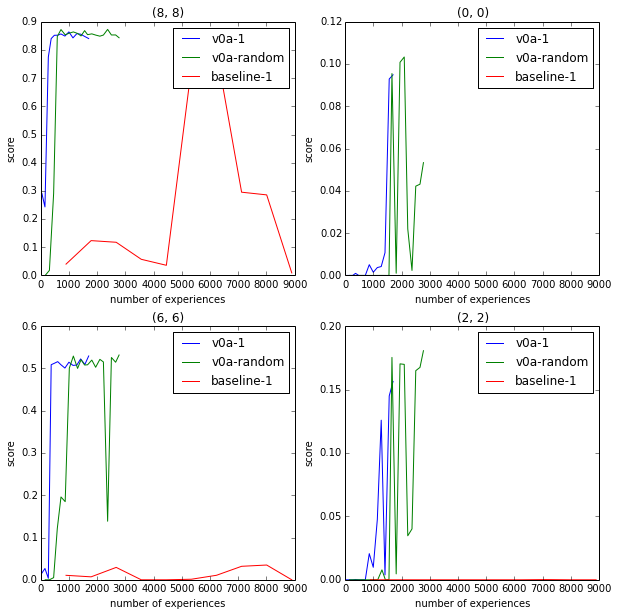

In [60]:
plot_mean_scores(['v0a-1', 'v0a-random', 'baseline-1'])

### V1 with DeepQlearnMT

In [46]:
dqn = DQN(task0, arch_func=two_layer, state_type=T.tensor4)

In [47]:
budget = 5
tol = 1e-4
gamma = 0.9
memory_size = 128
lr = 1e-3

learner = DeepQlearnMT(dqn, gamma=gamma, lr=lr, memory_size=memory_size, epsilon=0.1, update_strategy='task')
train_func = lambda task:  learner.run(task, num_episodes=1, tol=tol, budget=budget)
eval_func = lambda task: qval_stochastic(dqn, task, gamma=gamma, budget=budget, num_trials=100, tol=tol)

In [48]:
meta = GPv1(dqn, kernel_func, expand_func, train_func, eval_func, 
            eta=1e-4, sigma_n=0.1, K=1, K1=1)

In [49]:
start_locs = []
ims = []
scores = []
exs = []
for it in range(100):
    meta.run(tasks, num_epochs=1)
    to_show = ['curr_tasks', 'new-tasks-selected', 'im', 'pred', 'ucb']
    pprint({key: meta.diagnostics[key] for key in to_show})
    print '---------------------------------------'
    if (it + 1) % 1 == 0:
        test_score = {}
        for test_task in test_tasks:
            test_score[test_task.start_pos] = reward_stochastic(dqn, test_task, gamma=0.9,num_trials=100, tol=tol, method='eps-greedy', epsilon=0.)
        scores.append(test_score)
        exs.append(learner.total_exp)
        
        

{'curr_tasks': [(8, 8) -> (9, 9), (1, 4) -> (9, 9)],
 'im': {(1, 4) -> (9, 9): 0.0005668179485635329,
        (8, 8) -> (9, 9): 0.1254817883446151},
 'new-tasks-selected': [(8, 8) -> (9, 9)],
 'pred': {(0, 3) -> (9, 9): 7.6430335713116457e-05,
          (1, 3) -> (9, 9): 0.00020775919271198882,
          (2, 3) -> (9, 9): 7.8235822669401011e-05,
          (0, 4) -> (9, 9): 0.00020775919271198882,
          (1, 4) -> (9, 9): 0.00056474803824432005,
          (2, 4) -> (9, 9): 0.00021266701509677698,
          (0, 5) -> (9, 9): 7.8235822669401011e-05,
          (1, 5) -> (9, 9): 0.00021266701509677698,
          (2, 5) -> (9, 9): 9.1576667075275151e-05,
          (7, 7) -> (9, 9): 0.016919936819044603,
          (8, 7) -> (9, 9): 0.045992993587217736,
          (9, 7) -> (9, 9): 0.016919876778667391,
          (7, 8) -> (9, 9): 0.045992993587217736,
          (8, 8) -> (9, 9): 0.12502185866419016,
          (9, 8) -> (9, 9): 0.045992971499597315,
          (7, 9) -> (9, 9): 0.01691987677

KeyboardInterrupt: 

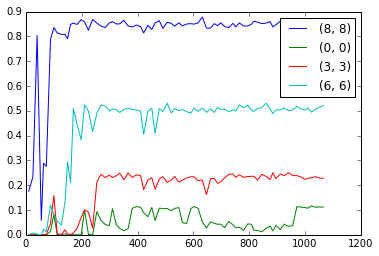

In [50]:
plot_scores()

### V1 with DeepQlearn

In [115]:
dqn = DQN(task0, arch_func=two_layer, state_type=T.tensor4)

In [97]:
budget = 30
tol = 1e-4
gamma = 0.9
memory_size = 1000
lr = 1e-3

learner = DeepQlearn(dqn, gamma=gamma, lr=lr, memory_size=memory_size, epsilon=0.1)
train_func = lambda task:  learner.run(task, num_episodes=3, tol=tol, budget=budget)
eval_func = lambda task: qval_stochastic(dqn, task, gamma=gamma, budget=budget, num_trials=100, tol=tol)

In [98]:
meta = GPv1(dqn, kernel_func, expand_func, train_func, eval_func, 
            eta=1e-4, sigma_n=0.1, K=1, K1=1, K0=1)

In [99]:
start_locs = []
ims = []
scores = []
exs = []
for it in range(20):
    meta.run(tasks, num_epochs=1)
    to_show = ['new-tasks-selected', 'im', 'pred', 'ucb']
    pprint({key: meta.diagnostics[key] for key in to_show})
    print '---------------------------------------'
    if (it + 1) % 1 == 0:
        test_score = {}
        for test_task in test_tasks:
            test_score[test_task.start_pos] = reward_stochastic(dqn, test_task, gamma=0.9,num_trials=100, tol=tol, method='eps-greedy', epsilon=0.)
        scores.append(test_score)
        exs.append(learner.total_exp)
        
        

{'im': {(8, 1) -> (9, 9): -0.00044832134565127941,
        (3, 3) -> (9, 9): -0.00077993654081748472,
        (7, 7) -> (9, 9): 0.0033516662077585288,
        (7, 8) -> (9, 9): -0.0011959926303165662},
 'new-tasks-selected': [(7, 7) -> (9, 9)],
 'pred': {(7, 0) -> (9, 9): -5.8432843810388518e-05,
          (8, 0) -> (9, 9): -0.00016432054715108003,
          (9, 0) -> (9, 9): -6.0450151058924964e-05,
          (7, 1) -> (9, 9): -0.00015883693751496473,
          (8, 1) -> (9, 9): -0.00044666955736322861,
          (9, 1) -> (9, 9): -0.00016432054715108003,
          (2, 2) -> (9, 9): -0.00010551972236994781,
          (3, 2) -> (9, 9): -0.00028683234386227258,
          (4, 2) -> (9, 9): -0.00010716790849240724,
          (7, 2) -> (9, 9): -4.352684738217329e-05,
          (8, 2) -> (9, 9): -0.00015883693751496473,
          (9, 2) -> (9, 9): -5.8432843810388518e-05,
          (2, 3) -> (9, 9): -0.00028587000126349167,
          (3, 3) -> (9, 9): -0.00077707522973611371,
          (4, 

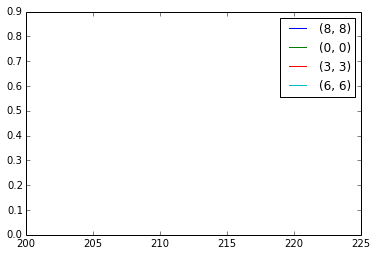

In [114]:
plot_scores()

## Baseline (random start)

In [23]:
dqn = DQN(task0, arch_func=two_layer, state_type=T.tensor4)
learner = DeepQlearn(dqn, gamma=0.9, lr=1e-3, memory_size = 128, epsilon=0.1)
scores = []
exs = []
tol = 1e-4
for it in range(10):
    task = prob.choice(tasks, 1)[0]
    learner.run(task, num_episodes=10, tol=tol)
    if (it + 1) % 1 == 0:
        test_score = {}
        for test_task in test_tasks:
            test_score[test_task.start_pos] = reward_stochastic(dqn, test_task, gamma=0.9,num_trials=100, tol=tol, method='eps-greedy', epsilon=0.)
        scores.append(test_score)
        exs.append(learner.total_exp)
    print 'it', it

KeyboardInterrupt: 

In [26]:
save_globals('random-1', ['exs', 'scores'])

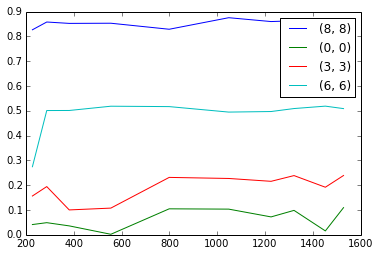

In [25]:
plot_scores()

## Baseline (start from (0,0))

In [41]:
task = test_tasks[0]
dqn = DQN(task, arch_func=two_layer, state_type=T.tensor4)
learner = DeepQlearn(dqn, gamma=0.9, lr=1e-3, memory_size = 128, epsilon=0.1)
scores = []
exs = []
tol = 1e-4
for it in range(10):
    learner.run(task, num_episodes=10, tol=tol)
    if (it + 1) % 1 == 0:
        test_score = {}
        for test_task in test_tasks:
            test_score[test_task.start_pos] = reward_stochastic(dqn, test_task, gamma=0.9,num_trials=100, tol=tol, method='eps-greedy', epsilon=0.)
        scores.append(test_score)
        exs.append(learner.total_exp)
    print 'it', it




it 0
it 1
it 2
it 3
it 4
it 5
it 6
it 7
it 8
it 9


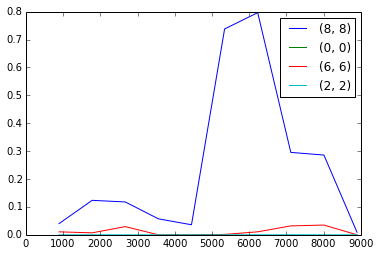

In [42]:
plot_scores()

In [43]:
save_globals('baseline-1', ['exs', 'scores'])

## Visualization

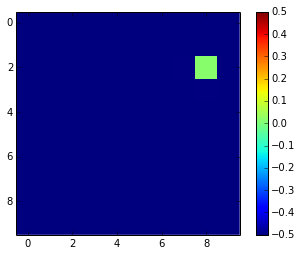

In [138]:

from ipywidgets import widgets, interact

def make_plot(i):
    (loc, im) = (start_locs[i], ims[i])
    grid = np.ones((H, W)) * -1.
    grid[loc] = im
    imshow(grid, interpolation='none', vmin=-.5, vmax=.5)
    colorbar()

interact(make_plot, i=(0,len(ims),1))


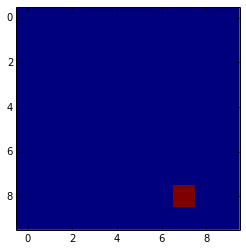

qvals [ 47.99788916  52.20889229  47.69676138  47.72885463]
p [ 0.01430037  0.96419043  0.01058204  0.01092716]
1


KeyboardInterrupt: 

In [100]:
task = test_tasks[3]
print task
task.reset()
while not task.is_end():
    imshow(task.curr_state[0], interpolation='none')
    show()
#     action = dqn.get_action(task.curr_state, method='eps-greedy', epsilon=0., valid_actions=task.valid_actions)
    action = dqn.get_action(task.curr_state, method='softmax', temperature=1e-2, valid_actions=task.valid_actions)
    print action
    sys.stdout.flush()
    task.step(action)
    time.sleep(0.5)
    clear_output()

In [102]:
reward_stochastic(dqn, task, gamma=0.9,num_trials=100, tol=tol, method='eps-greedy', epsilon=0.)

0.31843645660734682